# Analyse av anki-data
Gjort ved hjelp av python, uten bruk av pandas.

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pytz
import csv

In [3]:
with open("anki-reviews.csv") as file:
    data = csv.DictReader(file)
    reviews = list(data)
reviews[0]

{'id': '1645550962771',
 'cid': '1645550870303',
 'usn': '0',
 'ease': '3',
 'ivl': '-600',
 'lastIvl': '-60',
 'factor': '0',
 'time': '15705',
 'type': '0'}

In [4]:
dates = [
    datetime.utcfromtimestamp(int(r["id"]) / 1000).astimezone(
        pytz.timezone("Europe/Oslo")
    )
    for r in reviews
]

Text(0.5, 1.0, 'Review distribution over time')

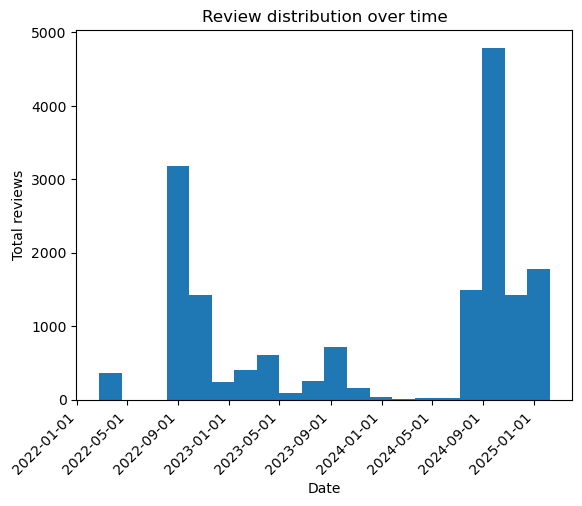

In [83]:
fig, ax = plt.subplots()
ax.hist(dates, bins=20)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Date")
ax.set_ylabel("Total reviews")
ax.set_title("Review distribution over time")

Text(0.5, 1.0, 'Card type distribution')

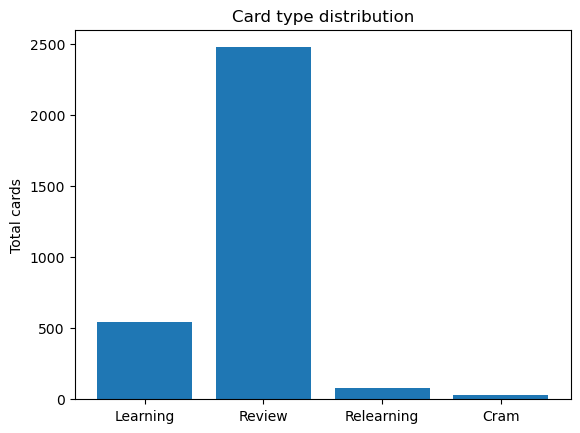

In [65]:
# Find only the last review of each card
cards = {}
for r in reviews:
    cards[r["cid"]] = r
cards = list(cards.values())

card_types = {}
for c in cards:
    card_types[c["type"]] = card_types.get(c["type"], 0) + 1
card_types = sorted(card_types.items(), key=lambda c: c[0])

fig, ax = plt.subplots()
ax.bar(*zip(*card_types))
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(["Learning", "Review", "Relearning", "Cram"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Total cards")
ax.set_title("Card type distribution")

Text(0.5, 1.0, 'Review ease distribution')

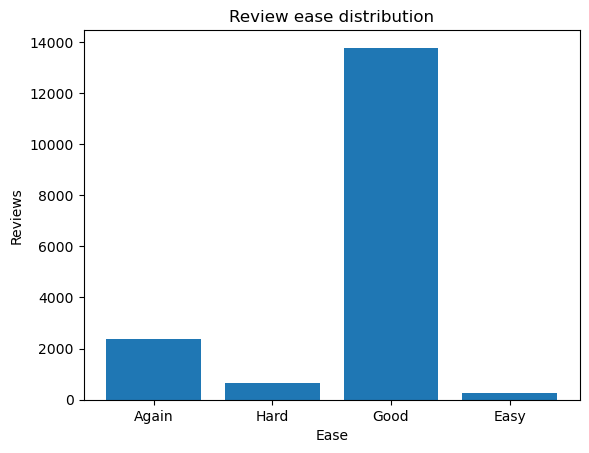

In [55]:
eases = {}
for r in reviews:
    eases[r["ease"]] = eases.get(r["ease"], 0) + 1
eases = sorted(eases.items(), key=lambda e: e[0])

fig, ax = plt.subplots()
ax.bar(*zip(*eases))
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(["Again", "Hard", "Good", "Easy"], rotation=0)
ax.set_xlabel("Ease")
ax.set_ylabel("Reviews")
ax.set_title("Review ease distribution")

Text(0.5, 1.0, 'Card interval distribution')

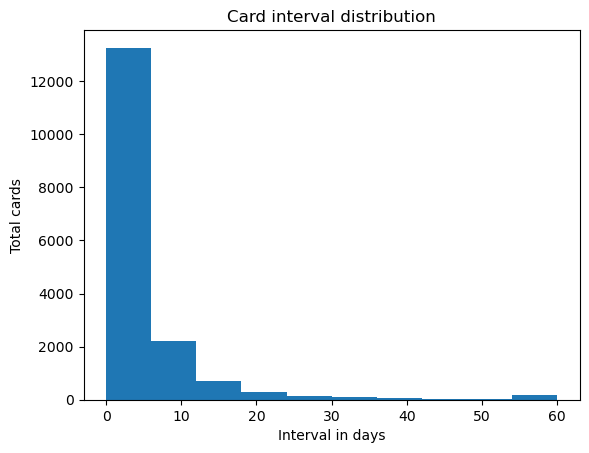

In [66]:
# Could just directly / 1000 instead of going through timedelta
times = [timedelta(milliseconds=int(r["time"])).total_seconds() for r in reviews]

fig, ax = plt.subplots()
ax.hist(times)
ax.set_xlabel("Interval in days")
ax.set_ylabel("Total cards")
ax.set_title("Card interval distribution")

Text(0.5, 1.0, 'Card interval distribution')

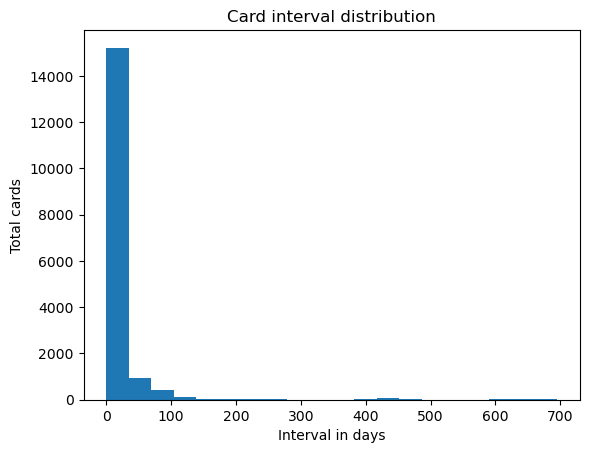

In [79]:
def parse_ivl(ivl):
    return timedelta(days=ivl) if ivl > 0 else timedelta(seconds=-ivl)
intervals = [parse_ivl(int(r["ivl"])).total_seconds() / 86400 for r in reviews]

fig, ax = plt.subplots()
ax.hist(intervals, bins=20)
ax.set_xlabel("Interval in days")
ax.set_ylabel("Total cards")
ax.set_title("Card interval distribution")

Text(0.5, 1.0, 'Reviews by weekday')

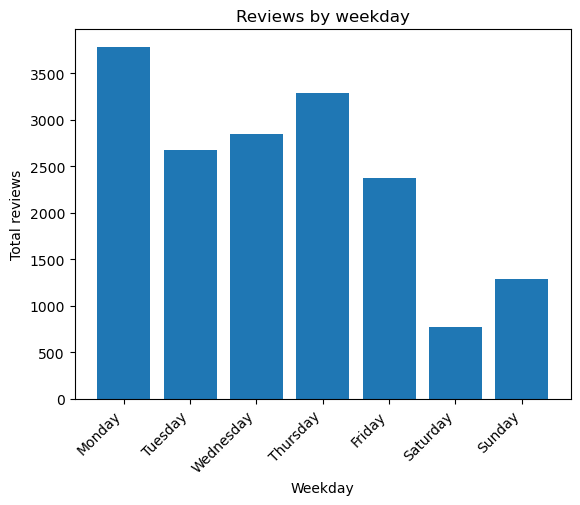

In [16]:
weekdays = {}
for d in dates:
    weekdays[d.weekday()] = weekdays.get(d.weekday(), 0) + 1
weekdays = sorted(weekdays.items(), key=lambda d: d[0])

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots()
ax.bar(days, [d[1] for d in weekdays])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Weekday")
ax.set_ylabel("Total reviews")
ax.set_title("Reviews by weekday")

<BarContainer object of 18 artists>

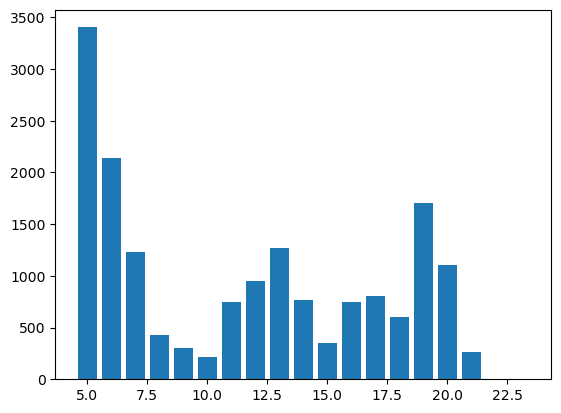

In [21]:
hours = {}
for d in dates:
    hour = d.hour
    hours[hour] = hours.get(hour, 0) + 1
#hours = sorted(hours.items(), key=lambda h: h[0])

fig, ax = plt.subplots()
ax.bar(*zip(*hours.items()))